In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Чтение данных
lectures_df_read = pd.read_csv ('data/lectures.csv', sep=',', 
    dtype={
            'type_of': 'category'
            }
    )
questions_df_read = pd.read_csv ('data/questions.csv', sep=',')


train_df_read = pd.read_csv ('data/train.csv', sep=',',
    dtype={
            'row_id': 'int32',
            'timestamp': 'int64',
            'user_id': 'int32',
            'content_id': 'int16',
            'content_type_id': 'int8',
            'task_container_id': 'int16',
            'user_answer': 'int8',
            'answered_correctly':'int8',
            'prior_question_elapsed_time': 'float32',
            'prior_question_had_explanation': 'boolean'
            },
    )

In [3]:
# создаем копию для работы
lectures_df = lectures_df_read.copy ()
questions_df = questions_df_read.copy ()
train_df = train_df_read.copy ()


Выведем основную информацию, чтобы ознакомиться с данными

In [4]:
lectures_df.info()
print ()
questions_df.info()
print()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lecture_id  418 non-null    int64   
 1   tag         418 non-null    int64   
 2   part        418 non-null    int64   
 3   type_of     418 non-null    category
dtypes: category(1), int64(3)
memory usage: 10.5 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   

In [5]:
display(lectures_df.head())
display(questions_df.head())
display(train_df.head())

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


Проверим на наличие плохих данных

In [6]:
display(lectures_df.isna().sum())
display(questions_df.isna().sum())
display(train_df.isna().sum())

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

**prior_question_elapsed_time** и **prior_question_had_explanation** могут быть пустыми по условию задания.

Отсутствие тэга в одном вопросе не повлияет на результаты анализа.

Разделим датасет с действиями учеников на лекции и семинары

In [7]:
train_lectures_df = train_df[train_df['content_type_id'] == 1].drop(columns=['content_type_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time', 'prior_question_had_explanation', 'row_id']).copy()
train_questions_df = train_df[train_df['content_type_id'] == 0].drop(columns='row_id').copy()

В задании необходимо проанализировать успешность учеников.

За успешность учеников будем принимать долю правильных ответов на вопросы.

Проанализируем, как завист успешность учеников от их активности. Для начала посмотрим на общее количество вопросов, на которые отвечали ученики.

Максимум отвеченых вопросов: 17609


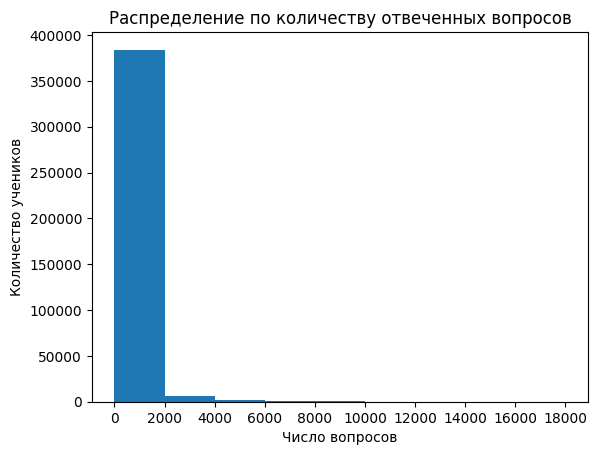

In [8]:

# Создаем новый датасет по ученикам
users_df=pd.DataFrame(data=train_df['user_id'].unique(), columns=['user_id'])
# Соединияем с датасетом по вопросам. Считаем количество вопросов и правильных ответов и долю правильных ответов
users_df=users_df.merge(right=train_questions_df.groupby('user_id')['answered_correctly'].agg(['sum', 'count']), left_on='user_id', right_on='user_id', how='left')
users_df['cor_share']=(users_df['sum']/users_df['count']*100).round()

print(f'Максимум отвеченых вопросов: {users_df['count'].max()}')
fig, ax1 = plt.subplots()
ax1.hist(users_df['count'], bins=np.arange(10)*2000)

ax1.set_title('Распределение по количеству отвеченных вопросов')

ax1.set_xlabel('Число вопросов')
ax1.set_ylabel('Количество учеников')
ax1.set_xticks(np.arange(10)*2000)

plt.show()


Видим, что большинство учеников ответили не более, чем на 2000 вопросов. При этом есть как минимум один ученик, ответивший на 17 609 вопросов.

Логично продолжить анализ на учениках с менее 2000 вопросов, чтобы не искажать данные нетипичными учениками

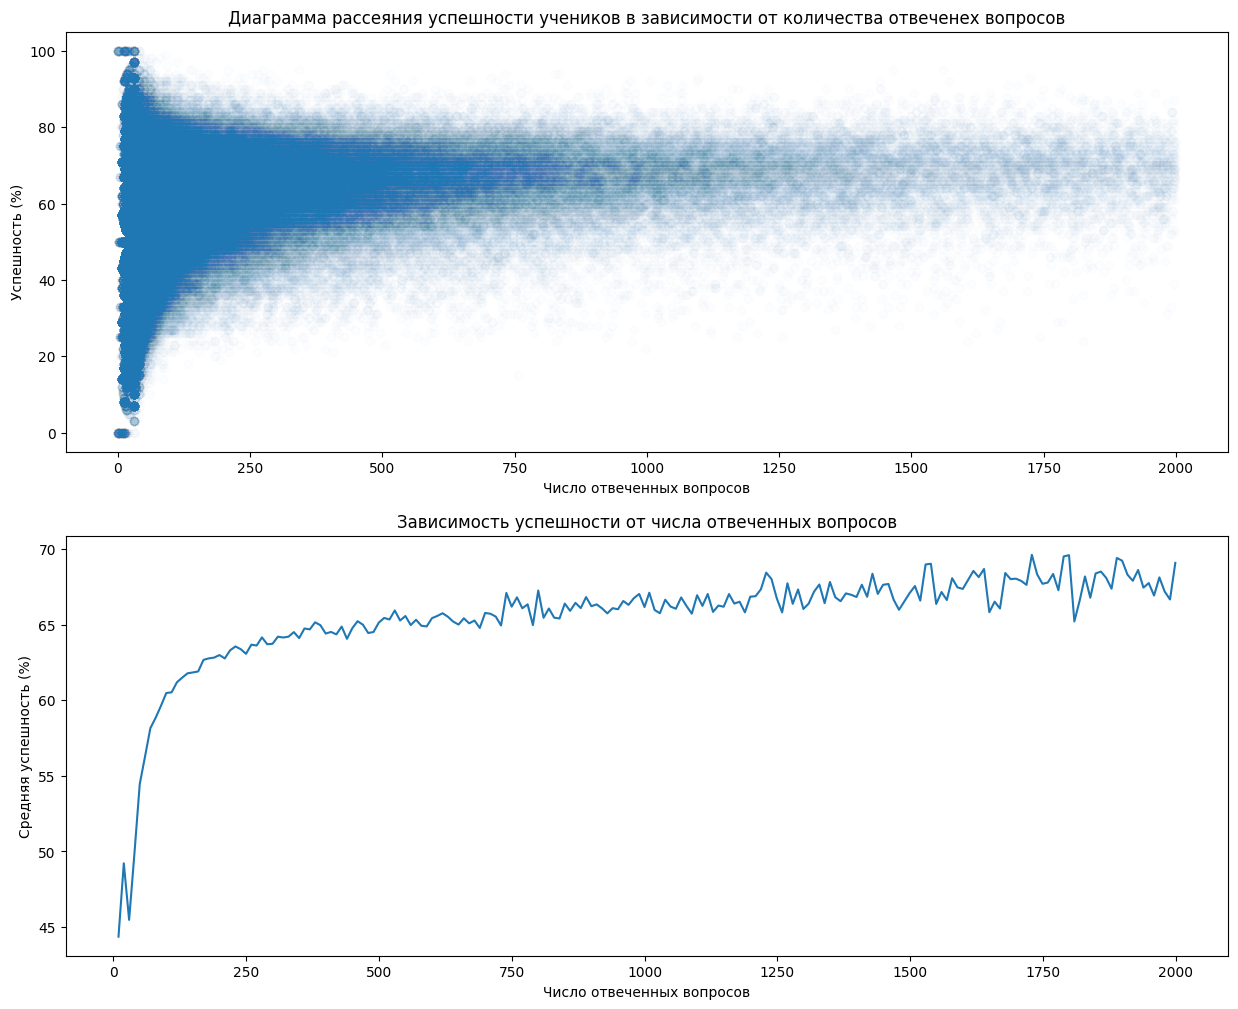

In [9]:


# Создаем датасет с учениками с менее 2000 вопросов. Делим количество вопросов на бины для построения графиков
count_limit = 2000
small_users_df=users_df[users_df['count'] < count_limit].copy()

small_users_df['count_cut']=pd.cut(small_users_df['count'], 200).apply(lambda x: x.right).astype('int')
grouped=small_users_df.groupby('count_cut')['cor_share'].mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

ax1.scatter(small_users_df['count'], small_users_df['cor_share'], alpha=0.01)

ax1.set_title('Диаграмма рассеяния успешности учеников в зависимости от количества отвеченех вопросов')
ax1.set_xlabel('Число отвеченных вопросов')
ax1.set_ylabel('Успешность (%)')

ax2.plot(grouped.index.to_numpy(), grouped)

ax2.set_title('Зависимость успешности от числа отвеченных вопросов')
ax2.set_xlabel('Число отвеченных вопросов')
ax2.set_ylabel('Средняя успешность (%)')


plt.show()


Можно увидеть, что примерно до 250 вопросов средняя успешность учеников резко растает, далее стаблизируется примерно на 65%.

Посмотрим, зависит ли успешность учеников от темы (какая тема самая сложная?).

In [10]:
# обхединим датасеты с информацией по ответам учеников и с ифномацией по вопросам
train_questions_df=train_questions_df.merge(right=questions_df, left_on='content_id', right_on='question_id', how='left').drop(columns='question_id')

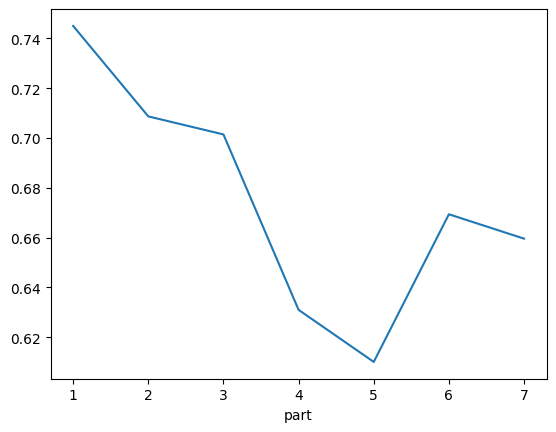

In [11]:
train_questions_df.groupby('part')['answered_correctly'].mean().plot()

plt.show()

Можно увидеть, что с первой по пятую темы идёт усложенение материала, с небольшим облегчением в 6 и 7 темах.

Посмотрим, влияет ли на успешность просмотр ответов на предыдущие вопросы

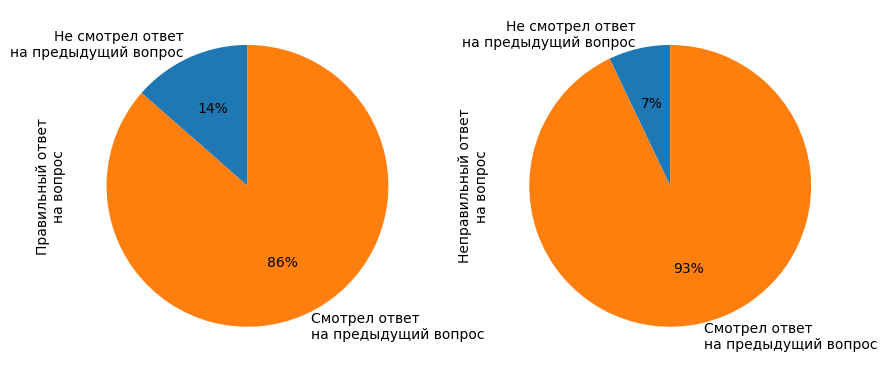

In [12]:
correct_watched = train_questions_df.pivot_table(index='prior_question_had_explanation', columns='answered_correctly', values='content_id', aggfunc='count')

correct_watched.rename(columns={0:'Правильный ответ\nна вопрос', 1: 'Неправильный ответ\nна вопрос'}, inplace=True)
correct_watched.rename(index={False:'Не смотрел ответ\nна предыдущий вопрос', True: 'Смотрел ответ\nна предыдущий вопрос'}, inplace=True)

correct_watched.plot(kind='pie', subplots=True, autopct='%1.0f%%', legend=False, figsize=(10,10), startangle=90)
plt.show()

Контринтуитивно видим, что для правильного ответа в 2 раза выше вероятность пропуска просмотра ответа и объяснения на предыдущий вопрос.

Возможно, это объясняется тем, что успешные ученики больше уверены в своих ответах и реже нуждаются в объяснениях.

Посмотрим, как на успеваемость влияет скорость ответа на вопросы предыдущего блока

In [13]:
# Создаём новый датасет с необходимой информацией, делим время на бины для построения графика
train_questions_df_cut=train_questions_df[['user_id', 'answered_correctly', 'prior_question_elapsed_time', 'part']].copy()
train_questions_df_cut['prior_question_elapsed_time']=pd.cut(train_questions_df_cut['prior_question_elapsed_time'], bins=100).apply(lambda x: x.right).astype('float')/1000


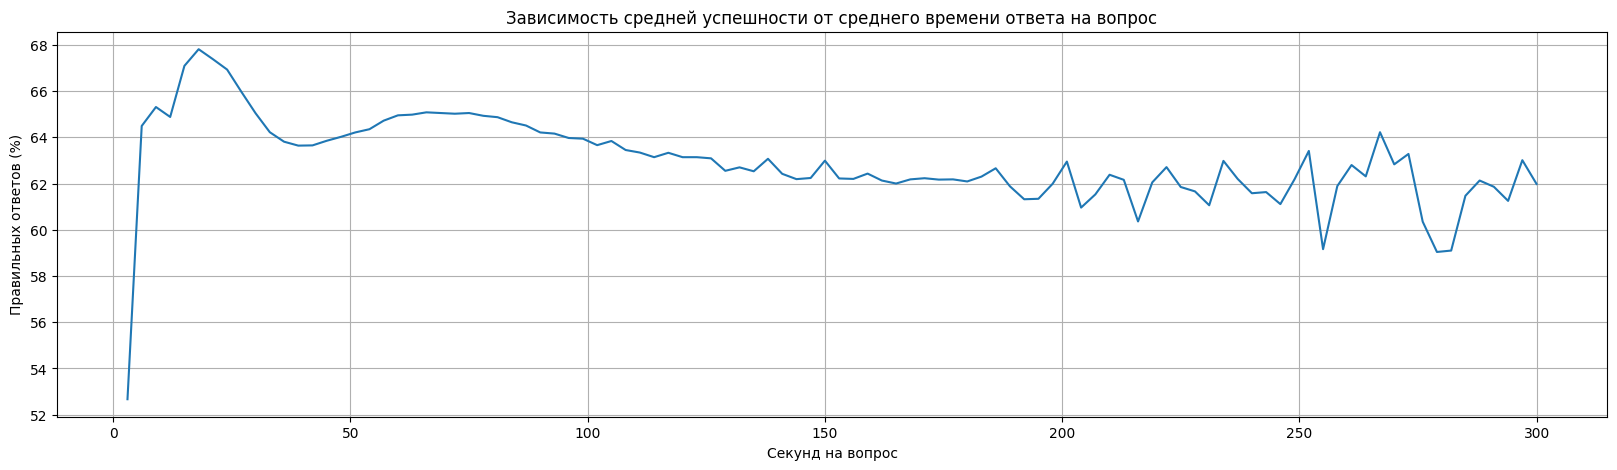

In [14]:
fig, ax1 = plt.subplots()
(train_questions_df_cut.groupby('prior_question_elapsed_time')['answered_correctly'].mean()*100).round(2).plot(figsize=(20,5), grid=True, ax=ax1)

ax1.set_title('Зависимость средней успешности от среднего времени ответа на вопрос')
ax1.set_xlabel('Секунд на вопрос')
ax1.set_ylabel('Правильных ответов (%)')

plt.show()

Видим, что больше всего правильных ответов дают примерно за 25 секунд с незначительным снижением точности при увеличении времени на раздумья.